<a href="https://colab.research.google.com/github/Preet1990/Deep-Neural-Network/blob/main/hand_writting_recognition_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator




In [116]:
tf.__version__

'2.8.2'

In [117]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.test.gpu_device_name()

''

# load in the dataset using Keras

In [118]:
from keras.datasets import mnist 

(trainsetX, trainsety),(testsetX,testsety) = mnist.load_data()

print('Train: X = {}, y = {}'.format(trainsetX.shape, trainsety.shape)) 
print('Test: X = {}, y = {}'.format(testsetX.shape, testsety.shape))

Train: X = (60000, 28, 28), y = (60000,)
Test: X = (10000, 28, 28), y = (10000,)


# Section I.II : Initial EDA

In [119]:
# Create graphs of the counts of each class

def plot_img(i):
  plt.subplot(int('23'+str(i+1)))
  plt.imshow(trainsetX[i])

  print('Lable :', trainsety[i])
  plt.show()

Lable : 5


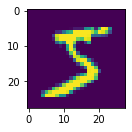

Lable : 0


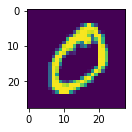

Lable : 4


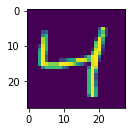

In [120]:
for i in range(3):
  plot_img(i)

In [121]:
# Check unique values

np.unique(trainsety,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

# Section II : Data Preparation

In [122]:
# Normalize the pixel value of the all images

trainsetX = trainsetX.astype(np.float32)/255
testsetX = testsetX.astype(np.float32)/255

# Why is scaling of the pixel value required ? Make a note

Note:- because these days all content needs to be scaled to native resolution before being rendered on screen.

**Pixel Scaling** refers to the process of scaling or adapting content that has been designed for a certain resolution to a higher resolution. 

# Explain the difference between pre-processed images and the normalized images

- **pre-processing** is to improve the quality of the image so that we can analyse it in a better way. By preprocessing we can suppress undesired distortions and enhance some features which are necessary for the particular application we are working for.

- **normalization** is a process that changes the range of pixel intensity values.It performing contrast adjustments to the image so that the intensity values of the image span the entire intensity range.

In [123]:
trainsetX.shape

(60000, 28, 28)

In [130]:
# input Shape and create Layers

cnn = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                 tf.keras.layers.Dense(128,activation = 'relu'),
                                 tf.keras.layers.Dense(60, activation=tf.nn.softmax)])

In [126]:
# cnn.add(tf.keras.layers.Dense(36, activation='sigmoid'))

In [131]:
# check parametres

cnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dense_15 (Dense)            (None, 60)                7740      
                                                                 
Total params: 108,220
Trainable params: 108,220
Non-trainable params: 0
_________________________________________________________________


In [132]:
# Get the loss and validation loss of the model and also the accuracy and the validation accuracy

cnn.compile(optimizer =tf.keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [133]:
#Traning the model

cnn.fit(trainsetX,trainsety,epochs=25,validation_split=0.3)

Epoch 1/25
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3437 - accuracy: 0.9062 - val_loss: 0.1969 - val_accuracy: 0.9428
Epoch 2/25
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1469 - accuracy: 0.9569 - val_loss: 0.1402 - val_accuracy: 0.9594
Epoch 3/25
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1022 - accuracy: 0.9694 - val_loss: 0.1224 - val_accuracy: 0.9628
Epoch 4/25
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0769 - accuracy: 0.9768 - val_loss: 0.1045 - val_accuracy: 0.9687
Epoch 5/25
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0587 - accuracy: 0.9824 - val_loss: 0.1080 - val_accuracy: 0.9676
Epoch 6/25
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0462 - accuracy: 0.9858 - val_loss: 0.1038 - val_accuracy: 0.9689
Epoch 7/25
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0361 - accuracy: 0.9895 - val_loss: 0.1044 - val_accuracy:

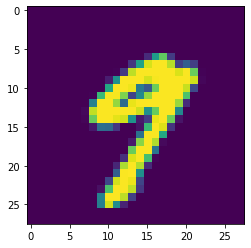

In [145]:
# Graphical plots of the model performance

plt.imshow(testsetX[20])

In [ ]:
testsetX[20]

In [147]:
# prediction

pred = cnn.predict([testsetX])

In [149]:
print(np.argmax(pred[20]))

9


In [160]:
# Graphical plots of the model performance on the train and test set during individual folds

def plot_test_img(i):
  plt.subplot(int('23'+str(i+1)))
  plt.imshow(testsetX[i])

  print('Lable :', np.argmax(pred[i]))
  plt.show()

Lable : 7


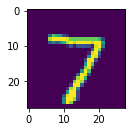

Lable : 2


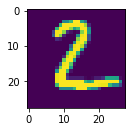

Lable : 1


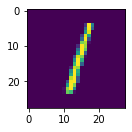

Lable : 0


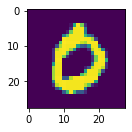

Lable : 4


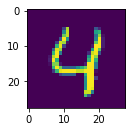

In [162]:
for i in range(5):
  plot_test_img(i)
